In [1]:
import datacube

from matplotlib import colors as mcolours
import numpy as np

%matplotlib inline

dc = datacube.Datacube()

In [2]:
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
clean_p,clean_p,clean version,None,None,None
d2m,d2m,test1209,None,None,None
era5_1,era5_1,test1209,None,None,None
era5_2,era5_2,test1209,None,None,None
prec,prec,test,None,None,None
precp,precp,test,None,None,None


In [3]:
datasets1 = dc.find_datasets(product="clean_p")
datasets1

[Dataset <id=0a74f1cd-5ceb-44d4-80e3-0e5cfd5d5604 product=clean_p location=file:///odctest/Clean/clean_p/2022/01/05/clean_p_2022-01-05.odc-metadata.yaml>]

In [4]:
datasetsNew = dc.find_datasets(
    product="clean_p",
    time=('2022-01-05')
)

ds = dc.load(
    datasets=datasetsNew,
    measurements=["d2m"],
    output_crs="EPSG:4326",
    resolution=(-1,1),
)
ds

<xarray.Dataset>
Dimensions:      (time: 1, latitude: 31, longitude: 160)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-05T09:00:00
  * latitude     (latitude) float64 30.5 29.5 28.5 27.5 26.5 ... 3.5 2.5 1.5 0.5
  * longitude    (longitude) float64 -0.5 0.5 1.5 2.5 ... 156.5 157.5 158.5
    spatial_ref  int32 4326
Data variables:
    d2m          (time, latitude, longitude) float64 -999.0 -999.0 ... nan nan
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

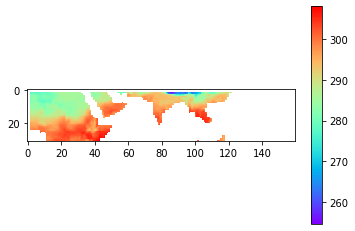

In [21]:
import numpy as np
data = ds[["d2m"]].to_array()
u = data[0, 0, :, :]
B = np.where(u==-999, np.nan, u)
plt.imshow(B, cmap = "rainbow")
plt.colorbar()